In [131]:
# imports
from astropy.table import QTable
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import os
import math
import shutil
import pdb
import subprocess
import re
from scipy import stats
%matplotlib inline

In [174]:
# we need to pull a few things
# semi, atmxeffh, final time.

data_dir = '/home/dm1681/Research/Research/Merging_Perts/new_atm/'

semi_list = np.array([])
H_list = np.array([])
time_list = np.array([])
env_lost_list = np.array([])

t = 10000
n = 0 
while n <=t-1:
    folder_name = '%05i'%n
    b = open(data_dir+folder_name+'/b.in','r')
    b_content = b.read()
    b_content = b_content.split('\n')
    semi = b_content[8]
    semi = semi.split('\t\t')
    semi = semi[1]
    semi_list = np.append(semi_list, semi)
    H = b_content[12]
    H = H.split('\t')
    H = H[1]
    H_list = np.append(H_list, H)
    
    b_fwd = open(data_dir+folder_name+'/sys.b.forward','r')
    b_fwd_content = b_fwd.read()
    b_fwd_content = b_fwd_content.split('\n')
    last_line = b_fwd_content[-2]
    last_line = last_line.split(' ')
    last_time = last_line[0]
    time_list = np.append(time_list, last_time)
    
    log = open(data_dir+folder_name+'/log','r')
    log_content = log.read()
    log_content = log_content.split('\n')
    halt_line = log_content[5]
    if halt_line == "HALT: b's envelope mass =  0.000000Earth Masses.":
        env_lost = 1
        env_lost_list = np.append(env_lost_list, env_lost)
    else:
        #print (halt_line)
        env_lost = 0
        env_lost_list = np.append(env_lost_list, env_lost)
    
    n += 1
    

    

In [175]:
env_lost_mask = np.where(env_lost_list == 1)
edge_lum_grid = np.where(time < 8e9)
env_lost_mask

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 103, 104, 105, 106,
        107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
        120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180

In [207]:
x_test_array = np.reshape(semi_list, (100,100))
y_test_array = np.reshape(H_list, (100,100))
z_test_array = np.reshape(time_list, (100,100))

time = np.array(time_list, dtype=np.float64)
semi = np.array(semi_list, dtype=np.float64)
H = np.array(H_list, dtype=np.float64)
time[edge_lum_grid].shape



(493,)

In [208]:
stats.mode(time)

ModeResult(mode=array([  8.31457100e+09]), count=array([1530]))

In [45]:
'''
with env_mass = 0.5 Mearth, only 375 planets lost their envelopes. 

lets lower that and see what happens


'''

1289

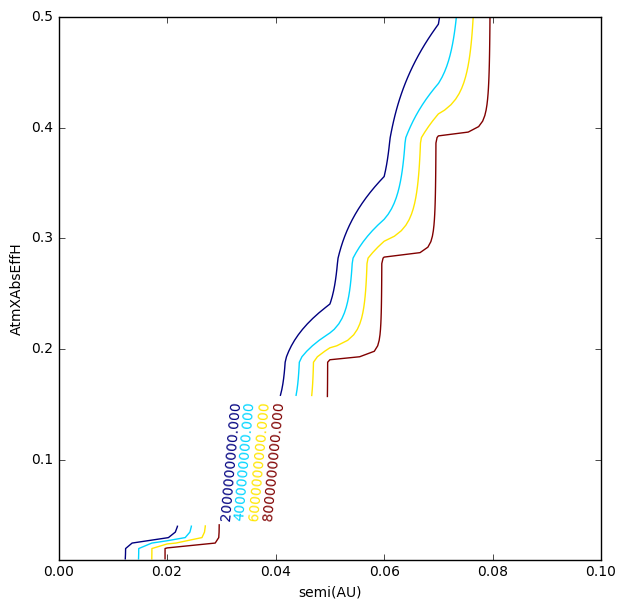

In [177]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

levels = [2e9,4e9,6e9,8e9]
ct = ax.contour(x_test_array, y_test_array, z_test_array, levels)
ax.clabel(ct,inline=True,fontsize=10)
ax.set(xlim=(0,0.1), xlabel='semi(AU)', ylabel='AtmXAbsEffH')
fig.savefig('atm_figs/p5mearthcore_p5mearthenv_small.png')

 (0, 1),

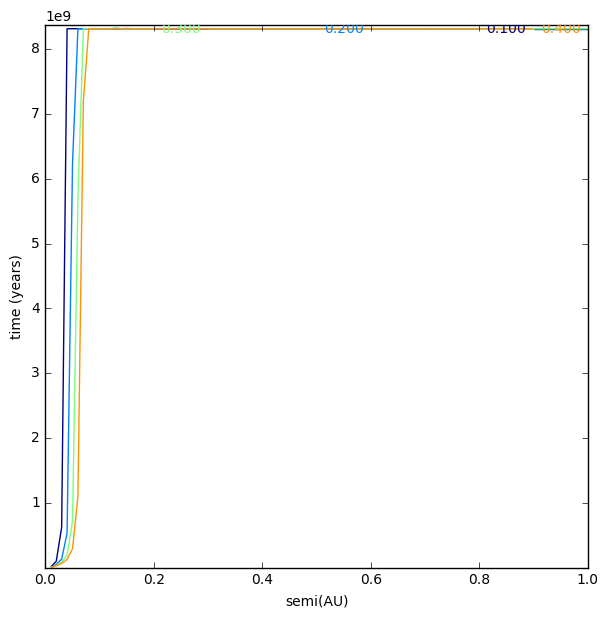

In [241]:

fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

levels = [0.1,0.2,0.3,0.4,0.5]
ct = ax.contour(x_test_array, z_test_array, y_test_array, levels)
ax.clabel(ct,inline=True,fontsize=10)
ax.set(xlim=(0,1), xlabel='semi(AU)', ylabel='time (years)')
#fig.savefig('atm_figs/p5mearthcore_p5mearthenv_small.png')

In [103]:

fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

ax.scatter(semi, time)

(9600,)

In [120]:
new_mask = np.where((semi >= 0.05) & (env_lost_list == 0)) 
time[new_mask].shape

(9600,)

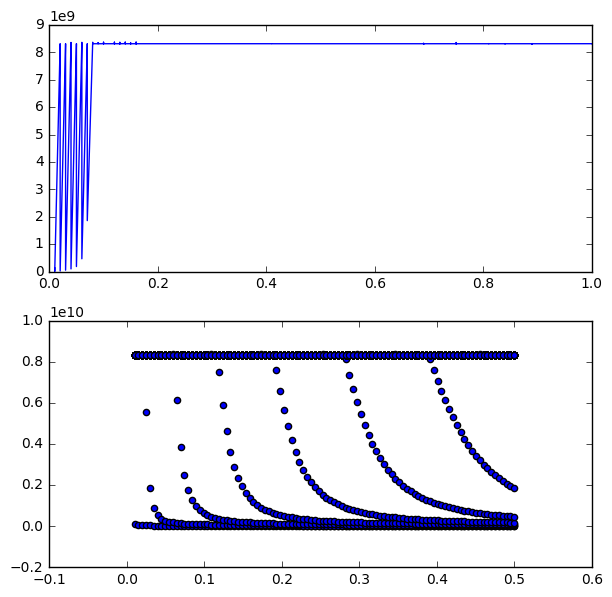

In [158]:
fig,ax = plt.subplots(2,1)
fig.set_size_inches(7,7)

ax[0].plot(semi,time)
ax[1].scatter(H,time)

In [ ]:
# solar mass
# mass = -2
# if still nothing low env.
# lehmer 2017 arxiv, atmesc
